<a href="https://colab.research.google.com/github/DariusTheGeek/Descriptive-and-Inferential-Analysis/blob/master/Descriptive_and_Inferential_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Research Question 1.
Is the number of Bluecars taken in postal code 75015 different from Bluecars taken from postal code 75017 on weekdays?

#### Hypothesis
Null Hyothesis: *The number of Bluecars taken from postal code 75015 is the same as in postal code 75017 during weekdays*
>$H_0: \mu_1 = \mu_2$

Alternative Hypothesis: *The number of Bluecars taken from postal code 75015 is not the same as in postal code 75017 during weekdays*
>$H_a: \mu_1 \neq \mu_2 $


## Research Question 2.
Is the number of Bluecars taken in postal code 75015 different from Bluecars taken from postal code 75017 on weekends?

#### Hypothesis

Null Hyothesis: *The number of Bluecars taken from postal code 75015 is the same as in postal code 75017 during weekends*
>$H_0: \mu_1 = \mu_2$

Alternative Hypothesis: *The number of Bluecars taken from postal code 75015 is not the same as in postal code 75017 during weekends*
>$H_a: \mu_1 \neq \mu_2 $

## Research Question 3.
Is the number of Bluecars taken in postal code 75015 greater than Bluecars taken in postal code 75017 on weekdays?

#### Hypothesis

Null Hyothesis: *The number of Bluecars taken from postal code 75015 is greater than the number in postal code 75017 during weekdays*
>$H_0: \mu_1 \ge \mu_2$

Alternative Hypothesis: *The number of Bluecars taken from postal code 75015 is less than the number in postal code 75017 during weekdays*
>$H_a: \mu_1 < \mu_2 $

## Research Question 4.
Is the number of Bluecars taken in postal code 75015 less than Bluecars taken in postal code 75017 on weekends?

#### Hypothesis

Null Hyothesis: *The number of Bluecars taken from postal code 75015 is less than the number in postal code 75017 during weekends*
>$H_0: \mu_1 \le \mu_2$

Alternative Hypothesis: *The number of Bluecars taken from postal code 75015 greater than the number in postal code 75017 during weekends*
>$H_a: \mu_1 > \mu_2 $

## Metrics of Success
A confidence level of 95% is used to test the set hypothesis

**Importing Libraries**

In [0]:
# The pandas library is used to load data into a dataframe containing rows and columns
# Matplotlib and seaborn will be used to make visualisations and graphs
# The statsmodels and scipy libraries are used to perform statistical calculations
#
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels

from scipy import stats
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import StandardScaler
import random
import numpy as np
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

In [568]:
# Loding the data dictionary
#
autolib_dictionary = pd.read_excel('http://bit.ly/DSCoreAutolibDatasetGlossary')

# Previewing the data dictionary
#
autolib_dictionary

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


In [569]:
# Loadind the autolib dataset using the pandas library
#
autolib = pd.read_csv('http://bit.ly/DSCoreAutolibDataset')

# Previewing the first five rows of the autolib dataset
#
autolib.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [570]:
# Previewing the last five rows of the autolib dataset
#
autolib.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [571]:
# Previewing some information about the autolib dataset
#
autolib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
Postal code               16085 non-null int64
date                      16085 non-null object
n_daily_data_points       16085 non-null int64
dayOfWeek                 16085 non-null int64
day_type                  16085 non-null object
BlueCars_taken_sum        16085 non-null int64
BlueCars_returned_sum     16085 non-null int64
Utilib_taken_sum          16085 non-null int64
Utilib_returned_sum       16085 non-null int64
Utilib_14_taken_sum       16085 non-null int64
Utilib_14_returned_sum    16085 non-null int64
Slots_freed_sum           16085 non-null int64
Slots_taken_sum           16085 non-null int64
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [572]:
# Displaying statistical summaries of the autolib dataset
#
autolib.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


In [573]:
# Checking the shape of the autolib dataset
#
autolib.shape

(16085, 13)

*The autolib dataset has a total of 16,085 rows and 13 columns*

In [574]:
# Checking the size of the autolib dataset
#
autolib.size

209105

*In total, there are 209,105 items/values in the autolib dataset*

In [575]:
# Checking the datatypes of the autolib dataset
#
autolib.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

*Only two columns out of the 13 columns contain object datatype, the rest of the columns are in int64*

In [576]:
# Checking for missing values in the autolib dataset
# The isnull() function is used to get all null values in the dataset
# The sum() function is used to get a total of all the null values per column
#
autolib.isnull().sum()  

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

*From above, it can be seen that this autolib dataset has no missing values*

## Tidying the dataset

#### Renaming Columns

In [577]:
# Previewing the columns in order to know how best to clean them
#
autolib.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [578]:
# The column names lack consistency and uniformity
# Some column names are in uppercase, others are in camel case and some contain spaces
# For uniformity, consistency and easy referencing all the columns have been changed to lower case and any spaces replaced with an underscore
#
autolib.columns = autolib.columns.str.lower().str.replace(' ', '_')

# Previewing the columns after cleaning
#
autolib.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

#### Changing column datatypes

In [579]:
# The date column should be changed to a datetime datatype for efficiency and easy referencing
# The day_type, postal_code and day of week columns should also be changed to categorical datatypes
#
# Changing the date column datatype to a datetime object
#
autolib.date = pd.to_datetime(autolib.date)

# A for loop is used to change the postal_code, dayofweek and day_type columns to categorical datatype
for column in ['postal_code', 'dayofweek', 'day_type']:
  autolib[column] = autolib[column].astype('category')
  
# Previewing the datatypes of the dataset to confirm whether the changes have been applied
#
autolib.dtypes

postal_code                     category
date                      datetime64[ns]
n_daily_data_points                int64
dayofweek                       category
day_type                        category
bluecars_taken_sum                 int64
bluecars_returned_sum              int64
utilib_taken_sum                   int64
utilib_returned_sum                int64
utilib_14_taken_sum                int64
utilib_14_returned_sum             int64
slots_freed_sum                    int64
slots_taken_sum                    int64
dtype: object

#### Checking for duplicated values

In [580]:
# To check for duplicated values, the pandas duplicated function has been used
# 
duplicated_values = autolib[autolib.duplicated()]

# Checking for the number of duplicated values
#
len(duplicated_values)

0

*The autolib dataset has no duplicates*

#### Checking for consistency, uniformity and whitespaces

In [581]:
# Checking for consistency and uniformity
# A for loop is used to print out the unique values for each column
#
for column in autolib.columns:        # Iterating through each column in the dataframe
  print(column)                       # Printing the column name
  print(autolib[column].nunique())    # Printing the number of unique values in each column
  print(autolib[column].unique())     # Printing only unique values in each column
  print('\n')                         # Creating a new line for better readability

postal_code
104
[75001, 75002, 75003, 75004, 75005, ..., 94700, 94800, 95100, 95870, 95880]
Length: 104
Categories (104, int64): [75001, 75002, 75003, 75004, ..., 94800, 95100, 95870, 95880]


date
156
['2018-01-01T00:00:00.000000000' '2018-01-02T00:00:00.000000000'
 '2018-01-03T00:00:00.000000000' '2018-01-04T00:00:00.000000000'
 '2018-01-05T00:00:00.000000000' '2018-01-06T00:00:00.000000000'
 '2018-01-07T00:00:00.000000000' '2018-01-08T00:00:00.000000000'
 '2018-01-09T00:00:00.000000000' '2018-01-10T00:00:00.000000000'
 '2018-01-11T00:00:00.000000000' '2018-01-12T00:00:00.000000000'
 '2018-01-13T00:00:00.000000000' '2018-01-14T00:00:00.000000000'
 '2018-01-15T00:00:00.000000000' '2018-01-16T00:00:00.000000000'
 '2018-01-17T00:00:00.000000000' '2018-01-18T00:00:00.000000000'
 '2018-01-19T00:00:00.000000000' '2018-01-20T00:00:00.000000000'
 '2018-01-21T00:00:00.000000000' '2018-01-22T00:00:00.000000000'
 '2018-01-23T00:00:00.000000000' '2018-01-24T00:00:00.000000000'
 '2018-01-25T00:00

In [0]:
# Creating a copy of the cleaned autolib dataset for later usage
# 
df = autolib.copy()

## Univariate Analysis

#### Mode
The [mode](https://www.investopedia.com/terms/m/mode.asp) is a statistical term that refers to the most frequently occurring number found in a set of numbers 

In [583]:
# A for loop has been used to print out the mode of each of the autolib columns
# The f string formatting has been used for readability
#
for column in autolib.columns:
  print(f'Mode for {column: <22} : {autolib[column].mode()[0]}')

Mode for postal_code            : 75001
Mode for date                   : 2018-01-24 00:00:00
Mode for n_daily_data_points    : 1440
Mode for dayofweek              : 0
Mode for day_type               : weekday
Mode for bluecars_taken_sum     : 12
Mode for bluecars_returned_sum  : 13
Mode for utilib_taken_sum       : 0
Mode for utilib_returned_sum    : 0
Mode for utilib_14_taken_sum    : 0
Mode for utilib_14_returned_sum : 0
Mode for slots_freed_sum        : 0
Mode for slots_taken_sum        : 0


*From above, it can be seen that the most frequent sum for the bluecars returned is 13 followed by 12 which is the sum of bluecars taken*

*The most popular postal code is 75001*

*In the other columns where the mode is zero, it shows that zero was the most frequent sum as compared with other sums within the columns*

#### Mean
The [statistical mean](https://www.techopedia.com/definition/26136/statistical-mean) refers to the mean or average that is used to derive the central tendency of the data in question. It is determined by adding all the data points in a population and then dividing the total by the number of points. In a way, it is a single number which can estimate the value of whole data set.

In [584]:
# Creating a list of numerical columns for conveniency
# All columns except the date, postal_code, dayofweek and day_type columns are numerical
# The pandas columns.difference() function has been used to select only numerical columns
#
numerical_columns = autolib[autolib.columns.difference(['date', 'day_type', 'postal_code', 'dayofweek'])].columns

# Calculating the mean of each of the numerical column
# A for loop has been used to print out the mean of each of the numerical columns
# The f string formatting has been used for readability
# The round function has been used to round of the mean to two decimal places
#
for column in numerical_columns:
  print(f'Mean for {column: <22} : {round(autolib[column].mean(), 2)}')

Mean for bluecars_returned_sum  : 125.91
Mean for bluecars_taken_sum     : 125.93
Mean for n_daily_data_points    : 1431.33
Mean for slots_freed_sum        : 22.63
Mean for slots_taken_sum        : 22.63
Mean for utilib_14_returned_sum : 8.6
Mean for utilib_14_taken_sum    : 8.6
Mean for utilib_returned_sum    : 3.7
Mean for utilib_taken_sum       : 3.7


#### Median
Median is a value which divides data in 2 equal parts i.e. number of values on right side is the same as the number of values on left side when the data arranged in either ascending or descending order.

In [585]:
# Calculating the median of each of the numerical column
# A for loop has been used to print out the median of each of the numerical columns
# The f string formatting has been used for readability
#
for column in numerical_columns:
  print(f'Median for {column: <22} : {autolib[column].median()}')

Median for bluecars_returned_sum  : 46.0
Median for bluecars_taken_sum     : 46.0
Median for n_daily_data_points    : 1440.0
Median for slots_freed_sum        : 0.0
Median for slots_taken_sum        : 0.0
Median for utilib_14_returned_sum : 3.0
Median for utilib_14_taken_sum    : 3.0
Median for utilib_returned_sum    : 1.0
Median for utilib_taken_sum       : 1.0


#### Standard Deviation
Standard deviation is a measurement of the average distance between each quantity in a dataset and the mean. 
Standard deviation tries to show how data is spread out from the mean. A low standard deviation indicates that the data points 
tend to be close to the mean of the dataset, while a high standard deviation indicates that the 
data points are spread out over a wider range of values.

In [586]:
# Calculating the standard deviation of each of the numerical columns
# A for loop has been used to print out the standard deviation of each of the numerical columns
# The f string formatting has been used for readability
# The round function has been used to round of the standard deviation to two decimal places
#
for column in numerical_columns:
  print(f'Standard deviation for {column: <22} : {round(autolib[column].std(), 2)}')

Standard deviation for bluecars_returned_sum  : 185.5
Standard deviation for bluecars_taken_sum     : 185.43
Standard deviation for n_daily_data_points    : 33.21
Standard deviation for slots_freed_sum        : 52.12
Standard deviation for slots_taken_sum        : 52.15
Standard deviation for utilib_14_returned_sum : 12.87
Standard deviation for utilib_14_taken_sum    : 12.87
Standard deviation for utilib_returned_sum    : 5.82
Standard deviation for utilib_taken_sum       : 5.82


#### Variance
Variance is the square of the average distance between each datapoint in a dataset and the mean. Simply, it is the square of the standard deviation. It can also be defined as a measure of how dispersed or spread out the values of a dataset are

In [587]:
# Calculating the variance of each of the numerical columns
# A for loop has been used to print out the variance of each of the numerical columns
# The f string formatting has been used for readability
# The round function has been used to round of the variance to two decimal places
#
for column in numerical_columns:
  print(f'Variance for {column: <22} : {round(autolib[column].std(), 2)}')

Variance for bluecars_returned_sum  : 185.5
Variance for bluecars_taken_sum     : 185.43
Variance for n_daily_data_points    : 33.21
Variance for slots_freed_sum        : 52.12
Variance for slots_taken_sum        : 52.15
Variance for utilib_14_returned_sum : 12.87
Variance for utilib_14_taken_sum    : 12.87
Variance for utilib_returned_sum    : 5.82
Variance for utilib_taken_sum       : 5.82


#### Range
Range is the difference between lowest and highest value.

In [588]:
# Finding the range of each numerical column
# A function has been ceated for efficiency
#
def calculating_range(column):         # Creating a function that calculates range
  maximum = autolib[column].max()      # Finding the maximum value in a column
  minimum = autolib[column].min()      # Finding the minimum value in a column
  column_range = maximum - minimum     # Calculating the difference between the maximum and minimum values
  return column_range                  # Returning the calculated range

# A for loop has been used to print out the calculated range of each of the numerical columns
# The f string formatting and alignment has been used for readability
#
for column in numerical_columns:
  print(f'Range for {column: <22} : {calculating_range(column)}')

Range for bluecars_returned_sum  : 1332
Range for bluecars_taken_sum     : 1352
Range for n_daily_data_points    : 266
Range for slots_freed_sum        : 360
Range for slots_taken_sum        : 359
Range for utilib_14_returned_sum : 101
Range for utilib_14_taken_sum    : 100
Range for utilib_returned_sum    : 58
Range for utilib_taken_sum       : 54


#### Inter Quartile Range
Quartiles are values that divide data into quarters provided that the data is sorted in an ascending order. 
There are three quartile values; first, second and third. The first quartile value is at 25 percentile, the second quartile is at 50 percentile and the third quartile is at the 75 percentile. 
The second quartile (Q2) is also the median of the whole data while the first quartile (Q1) is median of upper half of the data. The third Quartile (Q3) is the median of lower half of the data.

In [589]:
# Finding the quartiles of each of the numerical columns
# A for loop has been used to print out the first, second and third quartiles of each of the numerical columns
# The f string formatting and alignment has been used for readability
# f string alignment has also been used to increase readability
#
for column in numerical_columns:
  print(f'Quartiles for {column: <22} : Q1 - {list(autolib[column].quantile([0.25]))[0]: <7}\
  Q2 - {list(autolib[column].quantile([0.5]))[0]: <7}\
  Q3 - {list(autolib[column].quantile([0.75]))[0]}')

Quartiles for bluecars_returned_sum  : Q1 - 20.0     Q2 - 46.0     Q3 - 135.0
Quartiles for bluecars_taken_sum     : Q1 - 20.0     Q2 - 46.0     Q3 - 135.0
Quartiles for n_daily_data_points    : Q1 - 1439.0   Q2 - 1440.0   Q3 - 1440.0
Quartiles for slots_freed_sum        : Q1 - 0.0      Q2 - 0.0      Q3 - 5.0
Quartiles for slots_taken_sum        : Q1 - 0.0      Q2 - 0.0      Q3 - 5.0
Quartiles for utilib_14_returned_sum : Q1 - 1.0      Q2 - 3.0      Q3 - 10.0
Quartiles for utilib_14_taken_sum    : Q1 - 1.0      Q2 - 3.0      Q3 - 10.0
Quartiles for utilib_returned_sum    : Q1 - 0.0      Q2 - 1.0      Q3 - 4.0
Quartiles for utilib_taken_sum       : Q1 - 0.0      Q2 - 1.0      Q3 - 4.0


#### Skewness
Skewness is a measure of the asymmetry of the [probability distribution](http://bit.ly/ProbabilityDistribution)
of a real-valued random variable about its mean. The skewness value can be either positive or negative, or undefined.
In a perfect normal distribution, the tails on either side of the curve are exact mirror images of each other.
When a distribution is skewed to the left, the tail on the curve’s left-hand side is longer than the tail on the right-hand side,
and the mean is less than the mode. This situation is also called negative skewness.
When a distribution is skewed to the right, the tail on the curve’s right-hand side is longer than the tail on the left-hand side, 
and the mean is greater than the mode. This situation is also called positive skewness.

In [590]:
# Calculating the skewness of each numerical column
# A for loop has been used to print out the skewness of each of the numerical columns
# The f string formatting has been used for readability
# The round function has been used to round of the skewness value to two decimal places
#
for column in numerical_columns:
  print(f'Skewness for {column: <22} : {round(autolib[column].skew(), 2)}')

Skewness for bluecars_returned_sum  : 2.41
Skewness for bluecars_taken_sum     : 2.41
Skewness for n_daily_data_points    : -5.74
Skewness for slots_freed_sum        : 2.6
Skewness for slots_taken_sum        : 2.6
Skewness for utilib_14_returned_sum : 2.51
Skewness for utilib_14_taken_sum    : 2.51
Skewness for utilib_returned_sum    : 2.58
Skewness for utilib_taken_sum       : 2.56


#### Kurtosis
[kurtosis](https://en.wikipedia.org/wiki/Kurtosis) is a measure of the "tailedness" of the probability distribution of a real-valued random variable. Kurtosis can also be defined as a measure of whether the data points are heavy-tailed (profusion of outliers) or light-tailed (lack of outliers) relative to a normal distribution.
There are three types of Kurtosis: Mesokurtic, Leptokurtic and Platykurtic.
Mesokurtic is the distribution which has similar kurtosis as normal distribution kurtosis, which is zero.
Leptokurtic is the distribution which has kurtosis greater than a Mesokurtic distribution. Tails of such distributions are thick and heavy.
Platykurtic is the distribution which has kurtosis lesser than a Mesokurtic distribution. Tails of such distributions thinner. 

If the kurtosis is close to 0, then a normal distribution is often assumed. These are called mesokurtic distributions. 
If the kurtosis is less than zero, then the distribution is light tails and is called a platykurtic distribution. If the kurtosis is greater than zero, then the distribution has heavier tails and is called a leptokurtic distribution.

In [591]:
# Calculating the kurtosis of each numerical column
# A for loop has been used to print out the kurtosis of each of the numerical columns
# The f string formatting has been used for readability
# The round function has been used to round of the skewness to two decimal places
#
for column in numerical_columns:
  print(f'Kurtosis for {column: <22} : {round(autolib[column].kurt(), 2)}')

Kurtosis for bluecars_returned_sum  : 6.19
Kurtosis for bluecars_taken_sum     : 6.17
Kurtosis for n_daily_data_points    : 36.59
Kurtosis for slots_freed_sum        : 6.45
Kurtosis for slots_taken_sum        : 6.44
Kurtosis for utilib_14_returned_sum : 7.19
Kurtosis for utilib_14_taken_sum    : 7.19
Kurtosis for utilib_returned_sum    : 7.94
Kurtosis for utilib_taken_sum       : 7.7


#### Histogram
A histogram can be used to test whether data is normally distributed. 
This test simply consists of looking at the histogram and discerning 
whether it approximates the bell curve of a normal distribution.

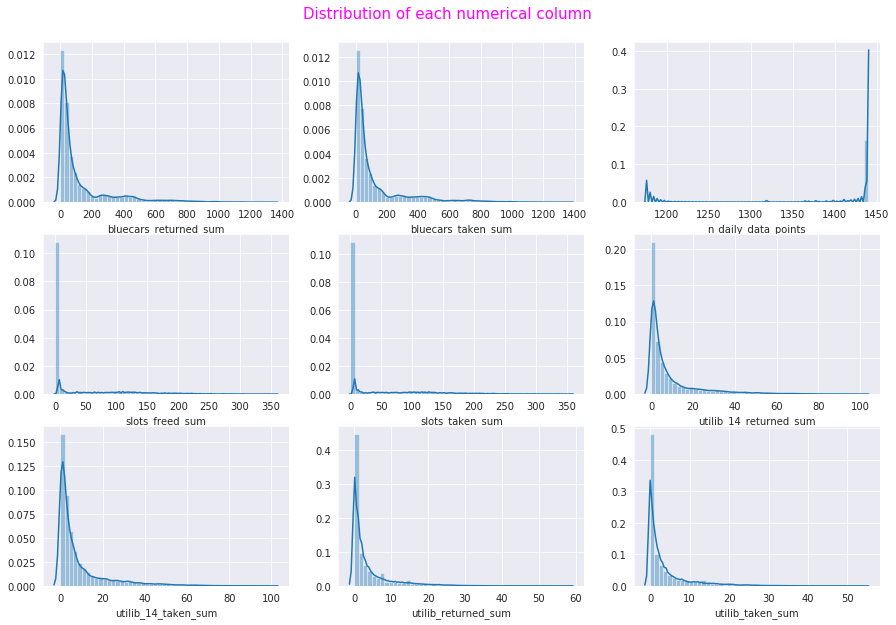

In [592]:
# Plotting histograms for each of the numerical columns to test for normality
# For easy analysis, the histograms have been plotted using subplots
# A fig object, i.e the canvas has been created measuring 15 by 10
# Nine subplots have been added into the fig object
# The nine subplots have been arranged into three rows and three columns
# A for loop has been used to plot each of the numerical columns into the subplots
# The seaborn plotting style has been set to dark grid for better visibility
#

sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (15, 10))
fig.suptitle('Distribution of each numerical column', y= 0.93, color = 'magenta', fontsize = 15)

for ax, data, name in zip(axes.flatten(), autolib, numerical_columns):
  sns.distplot(autolib[name], ax = ax)

#### Boxplots
A boxplot is a standardized way of displaying the distribution of data based on a five number summary i.e (“minimum”, first quartile (Q1), median (2), third quartile (Q3), and “maximum”). 
A boxplot can show outliers and what their values are. It can also tell if data is symmetrical, i.e how tightly the data is grouped, and how the data is skewed.

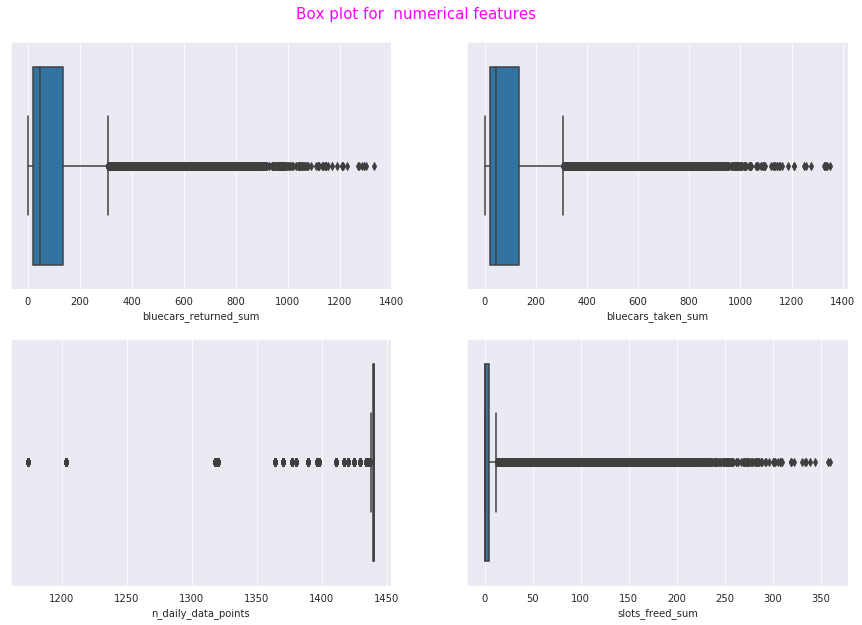

In [593]:
# Plotting boxplots for each of the numerical columns
# For easy analysis, the boxplots have been plotted using subplots
# A fig object, i.e the canvas has been created measuring 15 by 10
# Four subplots have been added into the fig object
# The four subplots have been arranged into two rows and two columns
# A for loop has been used to plot each of the numerical columns into the subplots
# The seaborn plotting style has been set to dark grid for better visibility
#
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
fig.suptitle('Box plot for  numerical features', y= 0.93, color = 'magenta', fontsize = 15)

for ax, data, name in zip(axes.flatten(), autolib, numerical_columns):
  sns.boxplot(autolib[name], ax = ax)

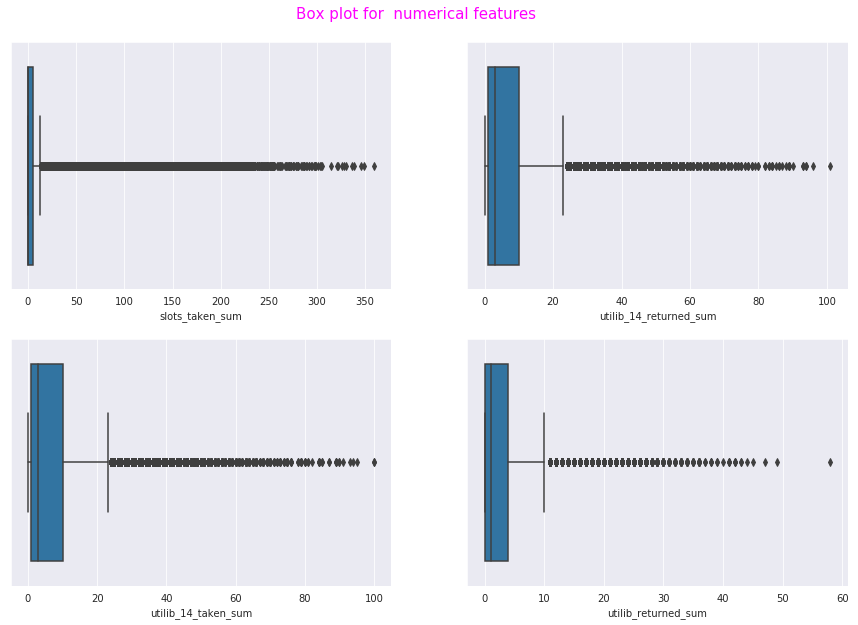

In [594]:
# Plotting boxplots for each of the numerical columns
# For easy analysis, the boxplots have been plotted using subplots
# A fig object, i.e the canvas has been created measuring 15 by 10
# Four subplots have been added into the fig object
# The four subplots have been arranged into two rows and two columns
# A for loop has been used to plot each of the numerical columns into the subplots
# The seaborn plotting style has been set to dark grid for better visibility
#

sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
fig.suptitle('Box plot for  numerical features', y= 0.93, color = 'magenta', fontsize = 15)

for ax, data, name in zip(axes.flatten(), autolib, numerical_columns[4:]):
  sns.boxplot(autolib[name], ax = ax)

*From the above boxplots, it can be seen that all of the numerical columns have outliers. An Inter Quartile Range will be used get the number of the outliers*

#### Checking for outliers

In [595]:
# Checking for outliers in numerical columns using the inter quantile range
# A dataframe of only numerical columns has been created
#
autolib1 = autolib[numerical_columns]   # Creating a dataframe of only numerical columns
Q1 = autolib1.quantile(0.25)            # Calculating the first qurtile value of the dataset
Q3 = autolib1.quantile(0.75)            # Calculating the third quartile value of the dataset

IQR = Q3 - Q1                          # Calculating the difference between the first and third qurtiles of the dataset

# Previweing the first five columns which contain outliers
#
((autolib1 < Q1 - 1.5 * IQR) | (autolib1 > Q3 + 1.5 * IQR)).head()

,bluecars_returned_sum,bluecars_taken_sum,n_daily_data_points,slots_freed_sum,slots_taken_sum,utilib_14_returned_sum,utilib_14_taken_sum,utilib_returned_sum,utilib_taken_sum
0,False,False,False,True,True,False,False,False,False
1,False,False,False,True,True,False,False,False,False
2,False,False,False,True,True,False,False,False,False
3,False,False,True,True,True,False,False,False,False
4,False,False,False,True,True,False,False,False,False


In [596]:
# Checking how many outliers were found in the dataset using the Inter Quartile Range method
#
len(autolib1[((autolib1 < Q1 - 1.5 * IQR) | (autolib1 > Q3 + 1.5 * IQR)).any(axis = 1)])

5646

*As we are not bulding any prediction model, the is no need to remove the outliers*

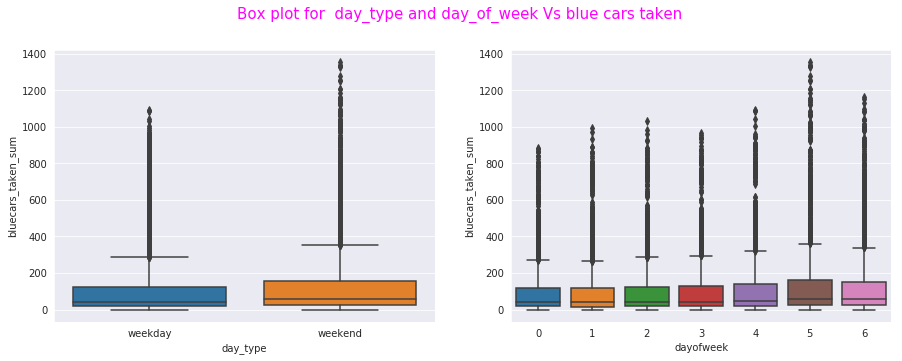

In [597]:
# Plotting boxplots for daysofweek and day_type Vs blue cars taken
# For easy analysis, the boxplots have been plotted using subplots
# A fig object, i.e the canvas has been created measuring 15 by 5
# Two subplots have been added into the fig object
# The two subplots have been arranged into one row and two columns
# A for loop has been used to plot each of the two columns into the subplots
# The seaborn plotting style has been set to dark grid for better visibility
#
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))
fig.suptitle('Box plot for  day_type and day_of_week Vs blue cars taken', y= 1, color = 'magenta', fontsize = 15)

for ax, data, name in zip(axes.flatten(), autolib, ['day_type', 'dayofweek']):
  sns.boxplot(autolib[name], autolib.bluecars_taken_sum, ax= ax)

In [598]:
autolib.head()

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,2018-01-01,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,2018-01-02,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,2018-01-03,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,2018-01-04,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,2018-01-05,1440,4,weekday,114,117,3,3,6,6,18,20


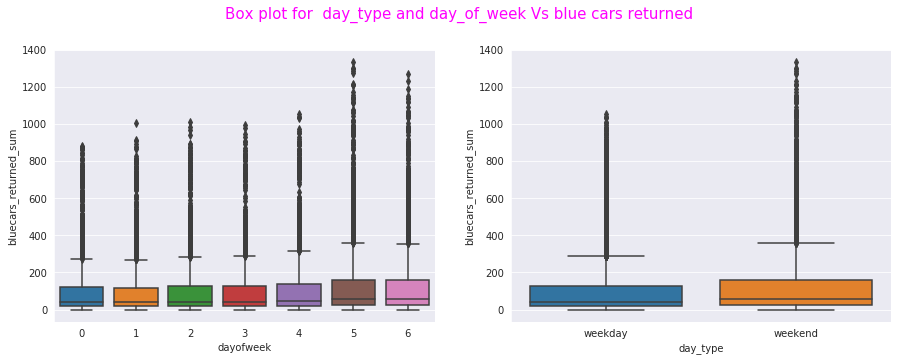

In [599]:
# Plotting bar charts for daysofweek and day_type Vs bluecars returned
# For easy analysis, the boxplots have been plotted using subplots
# A fig object, i.e the canvas has been created measuring 15 by 5
# Two subplots have been added into the fig object
# The two subplots have been arranged into one row and two columns
# A for loop has been used to plot each of the two columns into the subplots
# The seaborn plotting style has been set to dark grid for better visibility
#
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))
fig.suptitle('Box plot for  day_type and day_of_week Vs blue cars returned', y= 1, color = 'magenta', fontsize = 15)

for ax, data, name in zip(axes.flatten(), autolib, ['dayofweek', 'day_type']):
  sns.boxplot(autolib[name], autolib.bluecars_returned_sum, ax= ax)

#### Barcharts
A [bar chart](https://en.wikipedia.org/wiki/Bar_chart) is a chart that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent. The bars can be plotted vertically or horizontally.
A bar chart shows comparisons among discrete categories. One axis of the chart shows the specific categories being compared, and the other axis represents a measured value.

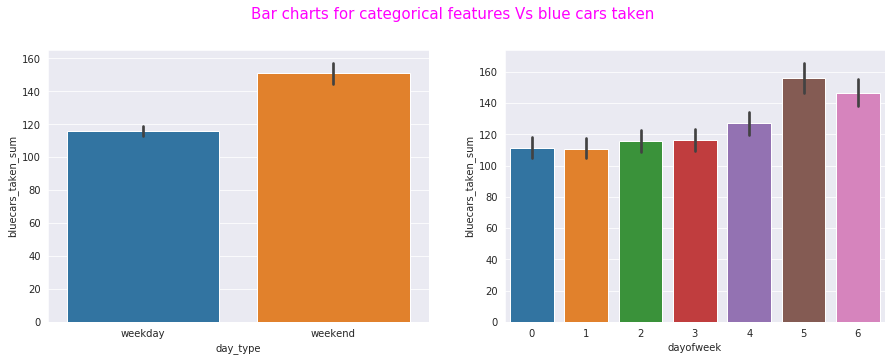

In [600]:
# Plotting bar charts for daysofweek and day_type
# For easy analysis, the boxplots have been plotted using subplots
# A fig object, i.e the canvas has been created measuring 15 by 5
# Two subplots have been added into the fig object
# The two subplots have been arranged into one row and two columns
# A for loop has been used to plot each of the two columns into the subplots
# The seaborn plotting style has been set to dark grid for better visibility
#
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))
fig.suptitle('Bar charts for categorical features Vs blue cars taken', y= 1, color = 'magenta', fontsize = 15)

for ax, data, name in zip(axes.flatten(), autolib, ['day_type', 'dayofweek']):
  sns.barplot(autolib[name], autolib.bluecars_taken_sum, ax= ax)

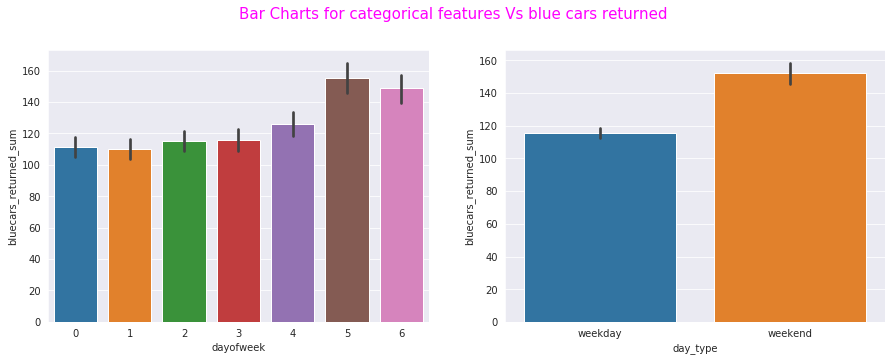

In [601]:
# Plotting bar charts for daysofweek and day_type Vs bluecars returned
# For easy analysis, the boxplots have been plotted using subplots
# A fig object, i.e the canvas has been created measuring 15 by 5
# Two subplots have been added into the fig object
# The two subplots have been arranged into one row and two columns
# A for loop has been used to plot each of the two columns into the subplots
# The seaborn plotting style has been set to dark grid for better visibility
#
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))
fig.suptitle('Bar Charts for categorical features Vs blue cars returned', y=1, color = 'magenta', fontsize = 15)

for ax, data, name in zip(axes.flatten(), autolib, ['dayofweek', 'day_type']):
  sns.barplot(autolib[name], autolib.bluecars_returned_sum, ax= ax)

#### Pie charts
A [pie chart](https://en.wikipedia.org/wiki/Pie_chart) is a circular statistical graphic, which is divided into slices to illustrate numerical proportion. In a pie chart, the arc length of each slice (and consequently its central angle and area), is proportional to the quantity it represents

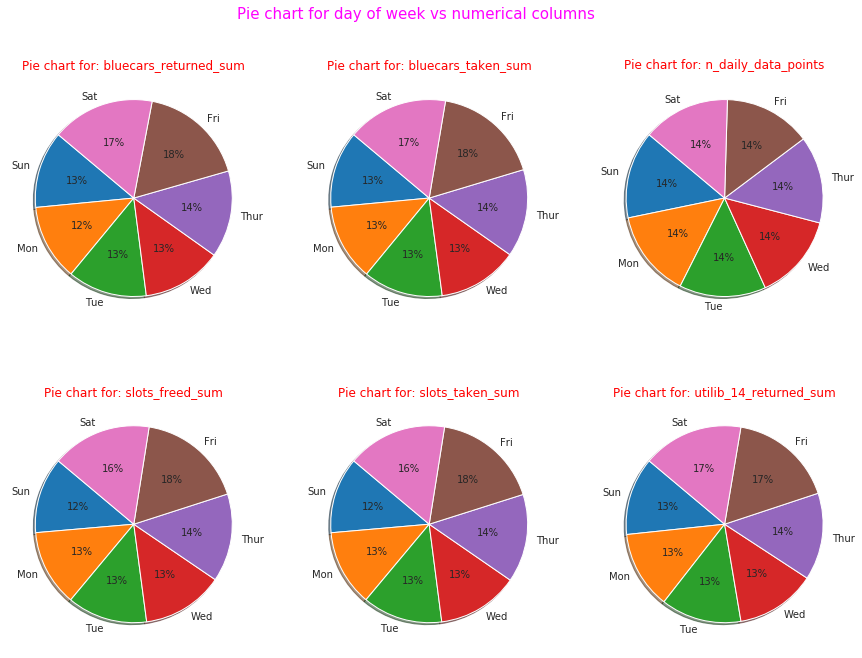

In [602]:
# Plotting pie charts for daysofweek and day_type Vs bluecars returned
# For easy analysis, the boxplots have been plotted using subplots
# A fig object, i.e the canvas has been created measuring 15 by 11
# Two subplots have been added into the fig object
# The two subplots have been arranged into one row and two columns
# A for loop has been used to plot each of the two columns into the subplots
# The seaborn plotting style has been set to dark grid for better visibility
#
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 11))
fig.suptitle('Pie chart for day of week vs numerical columns', y=0.95, color = 'magenta', fontsize = 15)

for ax, data, name in zip(axes.flatten(), autolib, numerical_columns):
  labels = ['Sun', 'Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat']
  data = autolib.groupby('dayofweek')[name].mean().values
  ax.pie(data,
         labels = labels,
         autopct='%1.0f%%',
         shadow=True,
         startangle=140)
  ax.set_title('Pie chart for: '+ name, color = 'red')

#### Frequency Tables
A [frequency table](https://www.mathsteacher.com.au/year8/ch17_stat/03_freq/freq.htm) is constructed by arranging collected data values in ascending order of magnitude with their corresponding frequencies.

In [603]:
# Creating Frequency table of each categorical column
# 
for column in ['dayofweek', 'day_type']:  # Iterating through each column in the categorical columns list             
  print(autolib[column].value_counts())   # Printing a frequency table of each categorical column
  print('\n')                             # Creating a new line for better readability

0    2374
1    2363
6    2274
4    2271
3    2268
2    2268
5    2267
Name: dayofweek, dtype: int64


weekday    11544
weekend     4541
Name: day_type, dtype: int64




In [604]:
# Creating frequency tables of all the three types of cars; bluecar, utilib and utilib_14 and their usage in the three days.
# A list of all the cars has used for efficiency
# A for loop has been used to create frequency tables for each column
#
cars_list = ['bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum','utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum']

for column in cars_list:
  print(autolib.groupby('dayofweek')[[column]].sum().sort_values(by = column, ascending = False))
  print('\n')

           bluecars_taken_sum
dayofweek                    
5                      353934
6                      332166
4                      288546
0                      263893
3                      263207
1                      261940
2                      261849


           bluecars_returned_sum
dayofweek                       
5                         351570
6                         338795
4                         286029
0                         264808
3                         262961
2                         260673
1                         260470


           utilib_taken_sum
dayofweek                  
5                     10227
6                      9722
4                      8363
2                      7822
0                      7819
3                      7786
1                      7748


           utilib_returned_sum
dayofweek                     
5                        10165
6                         9882
4                         8375
0                   

In [605]:
# Creating frequency tables of all the three types of cars; bluecar, utilib and utilib_14 and their usage in weekdays and weekends.
# A list of all the cars has used for efficiency
# A for loop has been used to create frequency tables for each column
#
cars_list = ['bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum','utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum']

for column in cars_list:
  print(autolib.groupby('day_type')[[column]].sum().sort_values(by = column, ascending = False))
  print('\n')

          bluecars_taken_sum
day_type                    
weekday              1339435
weekend               686100


          bluecars_returned_sum
day_type                       
weekday                 1334941
weekend                  690365


          utilib_taken_sum
day_type                  
weekday              39538
weekend              19949


          utilib_returned_sum
day_type                     
weekday                 39453
weekend                 20047


          utilib_14_taken_sum
day_type                     
weekday                 92341
weekend                 45999


          utilib_14_returned_sum
day_type                        
weekday                    92069
weekend                    46249




## Bivariate analysis
#### Scatter plot
A scatter plot is a graph in which values of two variables are plotted along two axes, the pattern of the resulting points revealing any correlation present.


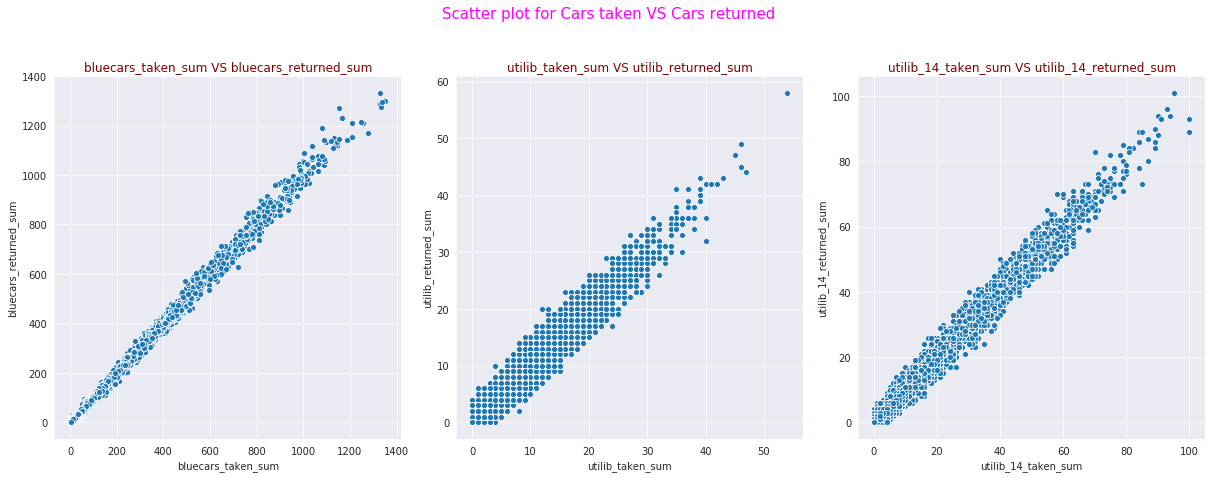

In [606]:
# Plotting scatter plots to compare bluecars, utilib cars and utili_14 cars when taken vs when returned
# For easy analysis, the boxplots have been plotted using subplots
# A fig object, i.e the canvas has been created measuring 17 by 6
# Three subplots have been added into the fig object
# The three subplots have been arranged into one row and three columns
# A for loop has been used to plot each of the three columns into the subplots
# The seaborn plotting style has been set to dark grid for better visibility
#
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (17, 6))
fig.suptitle('Scatter plot for Cars taken VS Cars returned', y=1.1, color = 'magenta', fontsize = 15)

taken_cols = ['bluecars_taken_sum', 'utilib_taken_sum', 'utilib_14_taken_sum']
returned_cols = ['bluecars_returned_sum', 'utilib_returned_sum', 'utilib_14_returned_sum']

for ax, data, taken, returned in zip(axes.flatten(), autolib, taken_cols, returned_cols):
  sns.scatterplot(autolib[taken], autolib[returned], ax = ax)
  ax.set_title(f'{taken} VS {returned}', color = 'maroon')
plt.tight_layout()

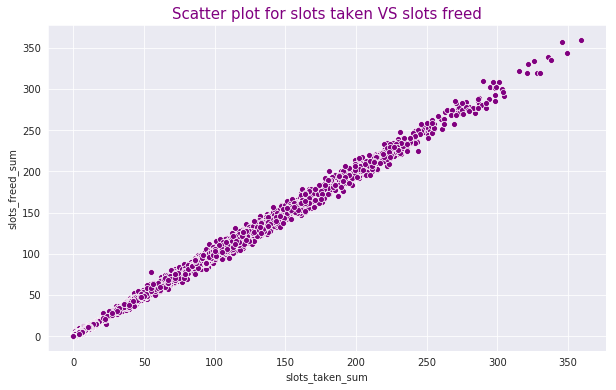

In [607]:
# Plotting a scatter plot for slots_freed_sum	and slots_taken_sum
# The figsize has been set to a width of 10 and a height of 6
# The seaborn plotting style has been set to dark grid for better visibility
#
fig = plt.figure(figsize = (10, 6))
sns.scatterplot(autolib.slots_taken_sum, autolib.slots_freed_sum, color = 'purple')
plt.title('Scatter plot for slots taken VS slots freed', color = 'purple', fontdict={'size': 15})
plt.show()

#### Line graphs
[Line Graphs](https://datavizcatalogue.com/methods/line_graph.html) are used to display quantitative values over a continuous interval or time period. A Line Graph is most frequently used to show trends and analyse how the data has changed over time.

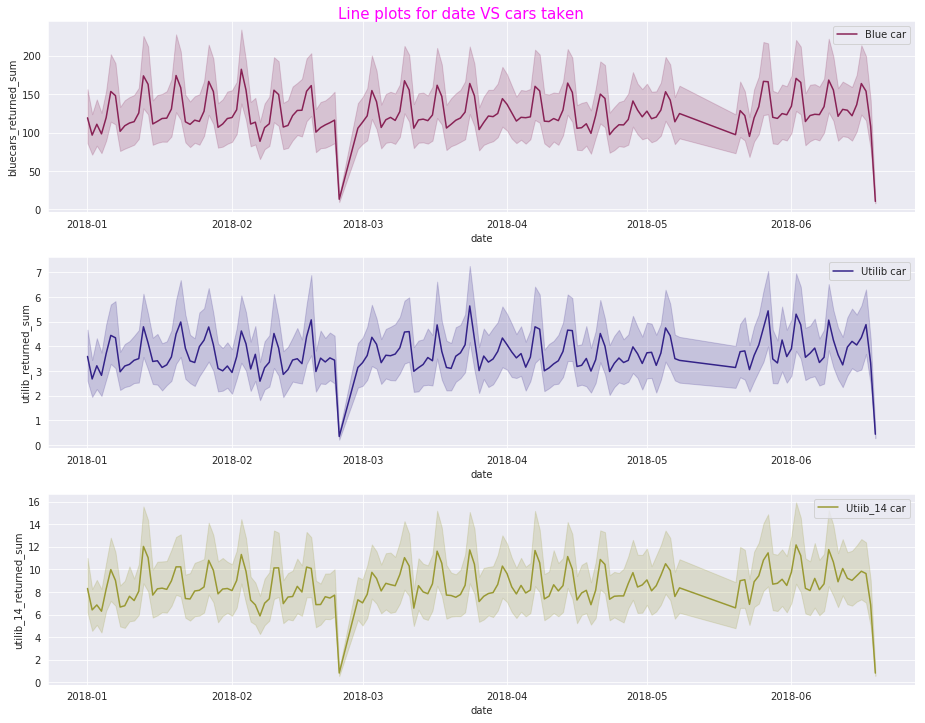

In [608]:
# Plotting line graphs to compare bluecars, utilib and utili_14  when taken 
# For easy analysis, the boxplots have been plotted using subplots
# A fig object, i.e the canvas has been created measuring 13 by 10
# Three subplots have been added into the fig object
# The three subplots have been arranged into three rows and one column
# A for loop has been used to plot each of the three columns into the subplots
# The seaborn plotting style has been set to dark grid for better visibility
# Lists of colors and legends have been created for efficiency
#
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (13, 10))
fig.suptitle('Line plots for date VS cars taken', y=1, color = 'magenta', fontsize = 15)

returned_cols = ['bluecars_returned_sum', 'utilib_returned_sum', 'utilib_14_returned_sum']
legends = ['Blue car', 'Utilib car', 'Utiib_14 car']
colors = ['#882255','#332288', '#999933' ]

for ax, data, returned, legend, color in zip(axes.flatten(), autolib, returned_cols, legends, colors):
  sns.lineplot(autolib.date, autolib[returned], ax = ax, label = legend, color = color)
plt.legend()
plt.tight_layout()

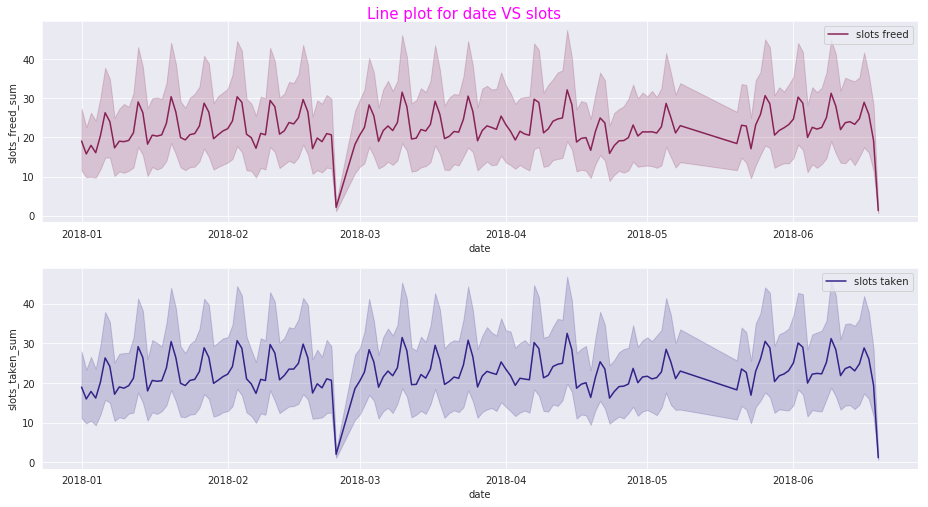

In [609]:
# Plotting line graphs to compare slots freed and slots taken vs date 
# For easy analysis, the boxplots have been plotted using subplots
# A fig object, i.e the canvas has been created measuring 17 by 6
# Two subplots have been added into the fig object
# The two subplots have been arranged into two rows and one column
# A for loop has been used to plot each of the two columns into the subplots
# The seaborn plotting style has been set to dark grid for better visibility
#
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (13, 7))
fig.suptitle('Line plot for date VS slots', y=1, color = 'magenta', fontsize = 15)

slots = ['slots_freed_sum', 'slots_taken_sum']
legends = ['slots freed', 'slots taken']
colors = ['#882255','#332288']

for ax, data, slot, legend, color in zip(axes.flatten(), autolib, slots, legends, colors):
  sns.lineplot(autolib.date, autolib[slot], ax = ax, label = legend, color = color)
plt.legend()
plt.tight_layout()

#### Correlation - Pearson
Correlation is a statistical measure that indicates the extent to which two or more variables fluctuate together. A positive correlation indicates the extent to which those variables increase in parallel; a negative correlation indicates the extent to which one variable increases as the other decreases.

In [610]:
# Calculating the correlation of numerical variables
# The pandas corr() function is used to find the correlation between variables
#
autolib.corr()

,n_daily_data_points,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
n_daily_data_points,1.000000,0.029411,0.030063,0.022669,0.023322,0.025738,0.026351,0.020873,0.021169
bluecars_taken_sum,0.029411,1.000000,0.998660,0.893833,0.892850,0.940946,0.940757,0.948575,0.947996
bluecars_returned_sum,0.030063,0.998660,1.000000,0.893613,0.893268,0.940542,0.941117,0.948258,0.948771
utilib_taken_sum,0.022669,0.893833,0.893613,1.000000,0.981982,0.847519,0.846304,0.853760,0.853049
utilib_returned_sum,0.023322,0.892850,0.893268,0.981982,1.000000,0.845645,0.845306,0.852939,0.852936
utilib_14_taken_sum,0.025738,0.940946,0.940542,0.847519,0.845645,1.000000,0.992062,0.899232,0.898719
utilib_14_returned_sum,0.026351,0.940757,0.941117,0.846304,0.845306,0.992062,1.000000,0.899442,0.899777
slots_freed_sum,0.020873,0.948575,0.948258,0.853760,0.852939,0.899232,0.899442,1.000000,0.999221
slots_taken_sum,0.021169,0.947996,0.948771,0.853049,0.852936,0.898719,0.899777,0.999221,1.000000


#### Heatmap
A heatmap is a graphical representation of data that uses a system of color-coding to represent different correlations.

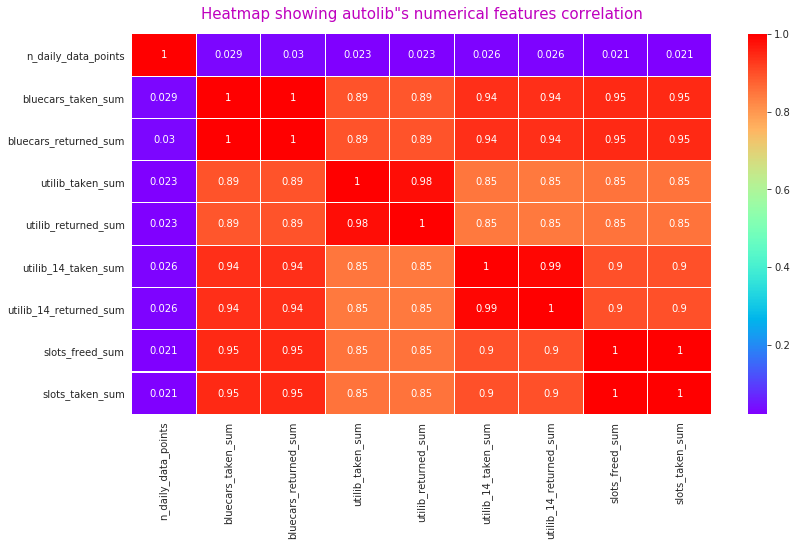

In [611]:
# A heatmap can be used to display correlations of the numerical columns of the autolib dataset
# The size of the plotting canvas has been set to 13 by 7
#
plt.figure(figsize= (13, 7))
sns.heatmap(autolib.corr(), annot = True, cmap='rainbow',linewidths=0.1,vmax=1.0, linecolor='white', square=False)
plt.title('Heatmap showing autolib"s numerical features correlation', color = 'm', pad = 15, fontdict={'size': 15})
plt.show()

## Multivariate analysis

#### Pairplot to show distributions

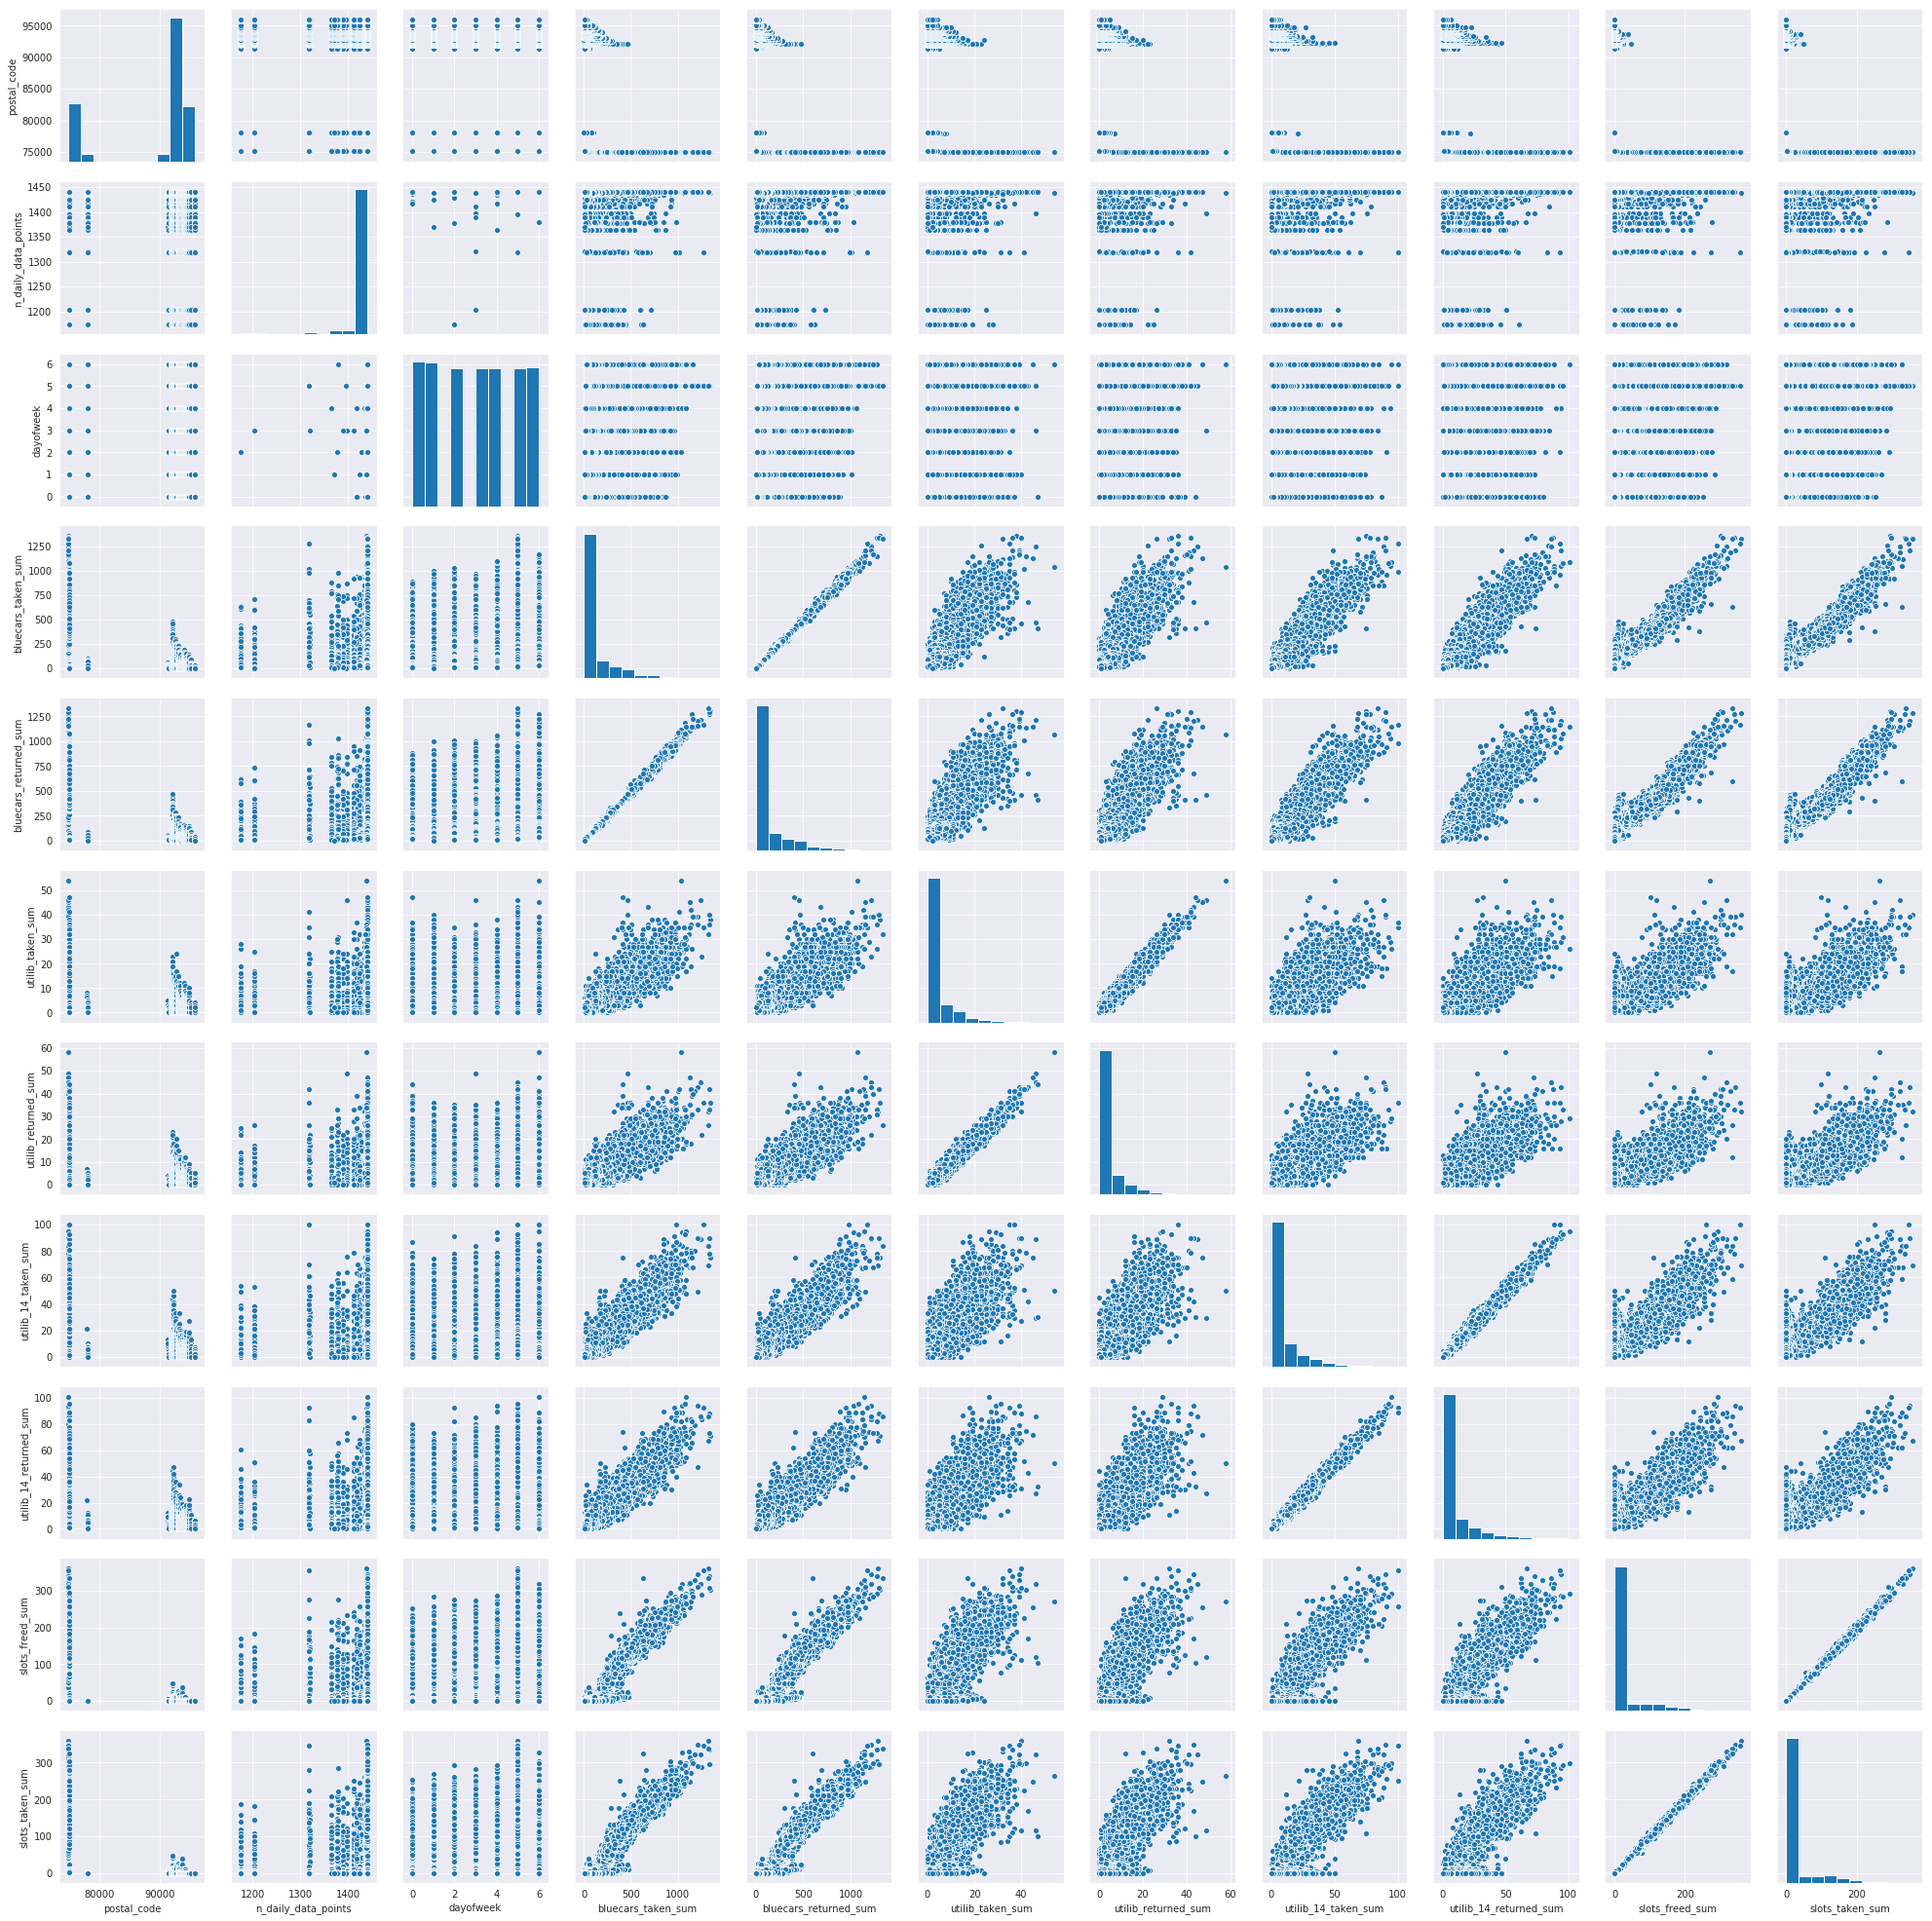

In [612]:
# Creating a pairplot to build histograms and scatter plots.
# The histogram on the diagonal shows the distribution of a single variable
# while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables.

sns.pairplot(autolib)
plt.show()

#### Multiple regression analysis

In [613]:
# Using multiple regression method to find out which features influence the usage of a specific postal code
# Using confidence level and significance level, the relationship between the feature and the response can be determined
# A predictor (an independent variable) that has a low p-value is likely to be a meaningful addition to the model because changes in the predictor's value 
# are related to changes in the response variable. Conversely, a larger (insignificant) p-value suggests that changes 
# in the predictor are not associated with changes in the response.

# Splitting the dataset into X and y
X = df.drop(['date', 'postal_code'], axis =1)
y = df['postal_code'].astype('int')

# Encoding categorical columns; day of week and day_type
X1 =pd.get_dummies(X)

# Standardising the X values to the same scale
sc = StandardScaler()
X = sc.fit_transform(X1)

# Applying the OLS model from statsmodel library
X2 = sm.add_constant(X)
model = sm.OLS(y, X2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            postal_code   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     1395.
Date:                Sun, 25 Aug 2019   Prob (F-statistic):               0.00
Time:                        21:26:00   Log-Likelihood:            -1.5995e+05
No. Observations:               16085   AIC:                         3.199e+05
Df Residuals:                   16069   BIC:                         3.201e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.879e+04     39.758   2233.302      0.0

*From the above table, it can be seen that the R2 score is 56.6%; this means that the model can predict with 56.6% accuracy which postal area code will be used given the features.*

#### Feature reduction

In [614]:
# Checking for columns that are important in predicting a postal code
# The model summary data has been changed into a dataframe
# This is achieved by first changing the model summary data to html and then converting the html table to a dataframe
# This will assist in concatinating columns to their p-values
#

model_summary_html = model.summary().tables[1].as_html()                        # Changing the model summary to html
model_summary_df = pd.read_html(model_summary_html, header=0, index_col=0)[0]   # Changing the created html model summary to a dataframe

# Appending the column name to the model summary
model_summary = model_summary_df.iloc[1:, :][['P>|t|']]   # Removing the constant row and selecting the p-value column only
model_summary['column'] = list(X1.columns)                # Adding the X feature columns to the model summary dataframe

# Selecting only features which have a p-value of less than 0.025
# The columns have been arranged in ascending order, starting with the most important
# Previewing columns which are most important in prediting the postal area code
#
model_summary[model_summary['P>|t|'] < 0.025].sort_values(by = 'P>|t|')            

,P>|t|,column
x17,0.000,day_type_weekday
x18,0.000,day_type_weekend
x15,0.001,dayofweek_5
x8,0.002,slots_freed_sum
x1,0.007,n_daily_data_points
x9,0.018,slots_taken_sum


*From above, the number of columns can be reduced from 18 to just 6 when creating a model to predict postal area code.*

## Research Question 1
Is the number of Bluecars taken in postal code 75015 different from Bluecars taken from postal code 75017 on weekdays?

#### Setting the Hypothesis
Null Hyothesis: *The number of Bluecars taken from postal code 75015 is the same as in postal code 75017 during weekdays*
>$H_0: \mu_1 = \mu_2$

Alternative Hypothesis: *The number of Bluecars taken from postal code 75015 is not the same as in postal code 75017 during weekdays*
>$H_a: \mu_1 \neq \mu_2 $

#### Selecting relevant data

In [615]:
# Selcting only relevant columns that will help in answering the research questions
#
relevant_df = autolib[['bluecars_taken_sum', 'postal_code', 'day_type']]

# Selecting Bluecars taken from postal code 75015 during weekdays
weekdays_75015_df = relevant_df[(relevant_df.postal_code == 75015) & (relevant_df.day_type == 'weekday')]

# Previewing the first three rows of the weekdays_75015_df dataframe
weekdays_75015_df.head(3)

,bluecars_taken_sum,postal_code,day_type
2184,781,75015,weekday
2185,710,75015,weekday
2186,739,75015,weekday


In [616]:
# Selecting Bluecars taken from postal code 75017 during weekdays
weekdays_75017_df = relevant_df[(relevant_df.postal_code == 75017) & (relevant_df.day_type == 'weekday')]

# Previewing the first three rows of the weekdays_75017_df dataframe
weekdays_75017_df.head(3)

,bluecars_taken_sum,postal_code,day_type
2496,634,75017,weekday
2497,548,75017,weekday
2498,638,75017,weekday


In [617]:
# Selecting Bluecars taken from postal code 75015 during weekends
weekends_75015_df = relevant_df[(relevant_df.postal_code == 75015) & (relevant_df.day_type == 'weekend')]

# Previewing the first three rows of the weekends_75015_df dataframe
weekends_75015_df.head(3)

,bluecars_taken_sum,postal_code,day_type
2189,1061,75015,weekend
2190,913,75015,weekend
2196,1255,75015,weekend


In [618]:
# Selecting Bluecars taken from postal code 75017 during weekends
weekends_75017_df = relevant_df[(relevant_df.postal_code == 75017) & (relevant_df.day_type == 'weekend')]

# Previewing the first three rows of the weekends_75017_df dataframe
weekends_75017_df.head(3)

,bluecars_taken_sum,postal_code,day_type
2501,928,75017,weekend
2502,795,75017,weekend
2508,992,75017,weekend


#### Sampling

In [619]:
# Checking for the length of each of the created dataframes to know which test to use in comparing their means
#
print(f'weekdays_75015_df has a length of {len(weekdays_75015_df)} \nweekdays_75017_df has a length of {len(weekdays_75017_df)}')
print(f'weekends_75015_df has a length of {len(weekends_75015_df)} \nweekends_75017_df has a length of {len(weekends_75017_df)}')

weekdays_75015_df has a length of 112 
weekdays_75017_df has a length of 112
weekends_75015_df has a length of 44 
weekends_75017_df has a length of 44


*As the number of values in the dataframes are greater than 30, a z-test will be used to check whether their is a significant difference between the two postal codes*

In [0]:
# A sample size of 90 values has been randomly selected from the weekdays_75017_df dataframe. 
# Sample for postal code 75017 has been created.
#
samp_75017 = random.sample(list(weekdays_75017_df.bluecars_taken_sum), k = 90)

# Changing the sample to a numpy array so as to perform calaculations
#
samp_75017 = np.array(samp_75017)

#### Assumptions for using a z-test


1.   Population mean and population standard deviation must be known.
2.   Sample mean is known.
3.   Sample observations were randomly drawn from a population.
4.   Sample size is known and sufficiently large i.e n>=30
5.   The population from which the sample is drawn from is approximately normal.

Formula for z-score is:

>$z = \displaystyle \frac{\overline{x} - \mu}{\frac{\sigma}{\sqrt{n}}}$


#### Normality tests
Normality tests are statistical processes used to determine if a sample or any group of data fits a standard normal distribution. Normality tests are used to influence the decision when working with a sample of data on whether to use specific kinds of statistical methods during analysis i.e. parametric or nonparametric methods.

[Normal distribution](https://www.investopedia.com/terms/n/normaldistribution.asp), also known as the Gaussian distribution, is a probability distribution that is symmetric about the mean, showing that data near the mean are more frequent in occurrence than data far from the mean. In graph form, normal distribution will appear as a bell curve


#### Testing for normality using a qqplot
[Q Q Plots](https://www.statisticshowto.datasciencecentral.com/q-q-plots/) (Quantile-Quantile plots) are plots of two quantiles against each other. A quantile is a fraction where certain values fall below that quantile. For example, the median is a quantile where 50% of the data fall below that point and 50% lie above it. The purpose of Q Q plots is to find out if two sets of data come from the same distribution. A 45 degree angle is plotted on the Q Q plot; if the two data sets come from a common distribution, the points will fall on that reference line.

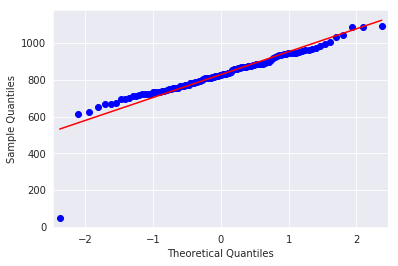

In [621]:
# Testing for normality using a qqplot
# Changing the weekdays_75015_df values to a numpy array so as to perform calculations
#
weekdays_75015_df = np.array(weekdays_75015_df.bluecars_taken_sum)
qqplot(weekdays_75015_df, line='s')
plt.show()

*From the above qqplot, it can be concluded that the population values (weekdays_75015_df) values are normally distributed*

In [0]:
# creating a function to calculate the z-score
#
def z_score_calc(sample_mean, pop_mean, pop_std, sample_size, n_tails):
  z_score = (sample_mean - pop_mean) /(pop_std/sqrt(sample_size))    # Calculating the z score
  # A 95% confidence level has an alpha of 0.05 for two tailed distribution
  alpha = 0.05
  # Calculating the p_value of the z_score
  p_value = round(1 - stats.norm.cdf(z_score), 3)
  if n_tails == 2:
    if p_value > alpha:
      print(f'The p-value of {p_value} is geater than the significance level of {alpha} \nTherefore there isn\'t enough evidence to suggest that there is a significant difference between the two means.\nWe FAIL to reject the null hypothesis')
    else:
	    print(f'The pvalue of {p_value} is less than the significance level of {alpha}. \nTherefore there is enough evidence to suggest that there is significant difference between the two means.\nWe REJECT the null hypothesis.')
  else:
    alpha = 0.025
    if p_value > alpha:
      print(f'The p-value of {p_value} is geater than the significance level of {alpha} \nTherefore there isn\'t enough evidence to suggest that there is a significant difference between the two means.\nWe FAIL to reject the null hypothesis')
    else:
	    print(f'The pvalue of {p_value} is less than the significance level of {alpha}. \nTherefore there is enough evidence to suggest that there is significant difference between the two means.\nWe REJECT the null hypothesis.')

In [623]:
# The weekdays_75015_df is the population
# The sample_75017 dataset is the sample
#
sample_size = 90                        # A sample size of 90 randomly selected values
pop_mean = weekdays_75015_df.mean()     # Calculating the population mean
pop_std = weekdays_75015_df.std()       # Calculating the population standard deviation
sample_mean = samp_75017.mean()         # Calculating the sample mean
n_tails = 2                             # This is a two tailed hypothesis testing

# Using the created z_score_calc
z_score_calc(sample_mean, pop_mean, pop_std, sample_size, n_tails)

The p-value of 1.0 is geater than the significance level of 0.05 
Therefore there isn't enough evidence to suggest that there is a significant difference between the two means.
We FAIL to reject the null hypothesis


## Research Question 2
Is the number of Bluecars taken in postal code 75015 different from Bluecars taken from postal code 75017 on weekends?


**Hypothesis setting**

Null Hyothesis: *The number of Bluecars taken from postal code 75015 is the same as in postal code 75017 during weekends*
>$H_0: \mu_1 = \mu_2$

Alternative Hypothesis: *The number of Bluecars taken from postal code 75015 is not the same as in postal code 75017 during weekends*
>$H_a: \mu_1 \neq \mu_2 $



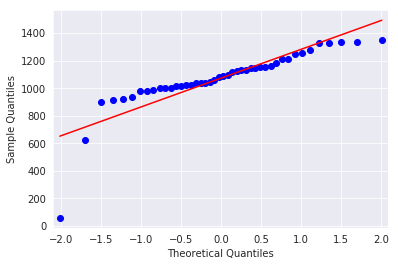

In [624]:
# Testing for normality using a qqplot
# Changing the weekends_75015_df values to a numpy array so as to perform calculations
#
weekends_75015_df = np.array(weekends_75015_df.bluecars_taken_sum)
qqplot(weekends_75015_df, line='s')
plt.show()

In [625]:
# A sample size of 90 values has been randomly selected from the weekends_75017_df dataframe. 
# Sample for postal code 75017.
#
samp_75017 = random.sample(list(weekends_75017_df.bluecars_taken_sum), k = 40)

# Changing the sample to a numpy array so as to perform calaculations
#
samp_75017 = np.array(samp_75017)

# The weekends_75015_df is the population
# The sample_75017 dataset is the sample
#
sample_size = 40                        # A sample size of 40 randomly selected values
pop_mean = weekends_75015_df.mean()     # Calculating the population mean
pop_std = weekends_75015_df.std()       # Calculating the population standard deviation
sample_mean = samp_75017.mean()         # Calculating the sample mean
n_tails = 2                             # This is a two tailed hypothesis testing

# Using the created z_score_calc
z_score_calc(sample_mean, pop_mean, pop_std, sample_size, n_tails)

The p-value of 1.0 is geater than the significance level of 0.05 
Therefore there isn't enough evidence to suggest that there is a significant difference between the two means.
We FAIL to reject the null hypothesis


## Research Question 3.
Is the number of Bluecars taken in postal code 75015 greater than Bluecars taken in postal code 75017 on weekdays?

**Hypothesis setting**

Null Hyothesis: *The number of Bluecars taken from postal code 75015 is greater than the number in postal code 75017 during weekdays*
>$H_0: \mu_1 \ge \mu_2$

Alternative Hypothesis: *The number of Bluecars taken from postal code 75015 is less than the number in postal code 75017 during weekdays*
>$H_a: \mu_1 < \mu_2 $

In [626]:
# Normality of the population dataset has already been tested and confirmed from above
# The weekdays_75015_df is the population
# The sample_75017 dataset is the sample
#
sample_size = 70                        # A sample size of 70 randomly selected values
pop_mean = weekdays_75015_df.mean()     # Calculating the population mean
pop_std = weekdays_75015_df.std()       # Calculating the population standard deviation
sample_mean = samp_75017.mean()         # Calculating the sample mean
n_tails = 1                             # This is a one tailed hypothesis testing

# Using the created z_score_calc
z_score_calc(sample_mean, pop_mean, pop_std, sample_size, n_tails)

The p-value of 0.106 is geater than the significance level of 0.025 
Therefore there isn't enough evidence to suggest that there is a significant difference between the two means.
We FAIL to reject the null hypothesis


## Research Question 4.
Is the number of Bluecars taken in postal code 75015 greater than Bluecars taken in postal code 75017 on weekends?

**Hypothesis setting**

Null Hyothesis: *The number of Bluecars taken from postal code 75015 is less than the number in postal code 75017 during weekends*
>$H_0: \mu_1 \le \mu_2$

Alternative Hypothesis: *The number of Bluecars taken from postal code 75015 is greater than the number in postal code 75017 during weekends*
>$H_a: \mu_1 > \mu_2 $



In [627]:
# Normality of the population dataset has already been tested and confirmed from above
# The weekends_75015_df is the population
# The sample_75017 dataset is the sample
#
sample_size = 35                        # A sample size of 35 randomly selected values
pop_mean = weekends_75015_df.mean()     # Calculating the population mean
pop_std = weekends_75015_df.std()       # Calculating the population standard deviation
sample_mean = samp_75017.mean()         # Calculating the sample mean
n_tails = 1                             # This is a one tailed hypothesis testing

# Using the created z_score_calc
z_score_calc(sample_mean, pop_mean, pop_std, sample_size, n_tails)

The p-value of 1.0 is geater than the significance level of 0.025 
Therefore there isn't enough evidence to suggest that there is a significant difference between the two means.
We FAIL to reject the null hypothesis


## Conclusion

*From the above analysis, it can be concluded that there isn't much difference in Bluecars taken during the weekends or weekdays.*

*This has been proven with a 95% confidence level during the hypothesis tests.*
### Challenging the solution
*More data is needed for more accurate results*